In [1]:
from transformers import pipeline, AutoImageProcessor, AutoModelForObjectDetection
import requests
from PIL import Image, ImageDraw
import torch

In [2]:
url = "https://datasets-server.huggingface.co/assets/keremberke/plane-detection/--/full/train/0/image/image.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image = image.resize((640, 360))

In [3]:
MODEL_CHECKPOINT = "./saved_model/"

image_processor = AutoImageProcessor.from_pretrained(MODEL_CHECKPOINT)
model = AutoModelForObjectDetection.from_pretrained(MODEL_CHECKPOINT)

In [4]:
with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected planes with confidence 0.504 at location [336.16, 38.32, 395.09, 110.18]


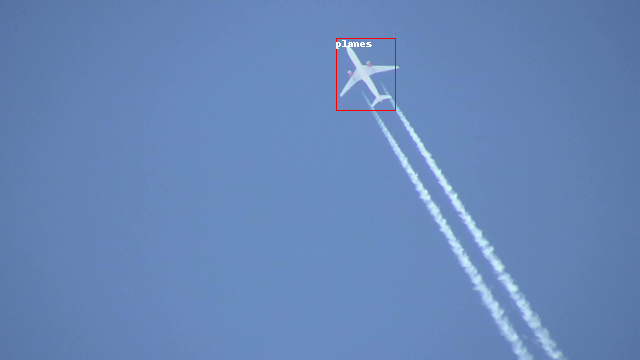

In [5]:
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")

image